# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile sum.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing sum.cpp


**Solución Grupo 14**


In [ ]:
%%writefile sum_2.cpp
#include <iostream>

long long sum_of_two_digits(int first_digit, int second_digit) {
    return (long long)first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing sum_2.cpp


In [ ]:
!g++ sum.cpp -o sum
!./sum

2147483647 2147483647
-2

In [ ]:
!g++ sum_2.cpp -o sum_2
!./sum_2

2147483647 2147483647
4294967294

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Overwriting output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./sum < input1.txt

12

In [ ]:
!./sum < input2.txt

4

Nuestro ejemplo

In [ ]:
%%writefile input3.txt
2147483647 2147483647

Writing input3.txt


In [ ]:
%%writefile output3.txt
4294967294

Writing output3.txt


In [ ]:
!./sum < input3.txt

-2

In [ ]:
!./sum_2 < input3.txt

4294967294

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

In [ ]:
!./sum < input3.txt> ctest3.txt
!grep -xvFf output3.txt ctest3.txt

-2


In [ ]:
!./sum_2 < input3.txt> ctest4.txt
!grep -xvFf output3.txt ctest4.txt

## Python

In [ ]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

4 5
9


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

In [ ]:
!python sum.py

2147483647 2147483647
4294967294


In [ ]:
!python sum.py  < input3.txt> ptest3.txt
!grep -xvFf output3.txt ptest3.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product1.cpp


In [ ]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1

4
5 4 6 3
30


Nuestro ejemplo: en este caso existe un overflow por el tamaño de los enteros, por lo que no sale la respuesta esperada

In [ ]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1

3
1 2147483647 2
2147483647


### Test 1: lagest input numbers 200000 200000 in the input

In [ ]:
%%writefile input1.txt
5
1 3 200000 9 200000 23

Overwriting input1.txt


In [ ]:
!./max_pairwise_product1 < input1.txt

1345294336


In [ ]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product2.cpp


In [ ]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

40000000000


### Test 2  generate a tests file with the maximun n 200000 numbres and measure time

In [ ]:
%%writefile generate200k.cpp
#include <iostream>
#include <time.h>
int generate200k(){
  srand (time(NULL));
  std::cout << 200000<<"\n";
    for(int i=0;i<200000;i++){
        int random = rand() %(200000 + 1);
        std::cout << random<< "\n";
    }
}


int main() {
    generate200k();
    return 0;
}

Overwriting generate200k.cpp


In [ ]:
!g++ generate200k.cpp -o 200kdata
!./200kdata > input200kData.txt

In [ ]:
%time !./max_pairwise_product2 < input200kData.txt

39999600000
CPU times: user 741 ms, sys: 101 ms, total: 841 ms
Wall time: 1min 59s


### Efficient solution 

In [ ]:
%%writefile EfficientMaxPro.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max = 0;
    long long max2 = 0;
    int n = numbers.size();

    for (int i = 0; i < n; ++i) {
        if (max<numbers[i]){
            max2 = max;
            max = numbers[i];
        }
        else if(max2<numbers[i]){
            max2 = numbers[i];
        }
    }

    return (long long) max*max2;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing EfficientMaxPro.cpp


Stress tests 

In [ ]:
%%writefile testEfficient1.txt
5
1 2 5 200000 1400

Writing testEfficient1.txt


In [ ]:
%%writefile testEfficient1out.txt
280000000

Writing testEfficient1out.txt


Measure with test file of the maximun n 200000 numbres 

In [ ]:
!g++ EfficientMaxPro.cpp -o EfficientMaxPro
!./EfficientMaxPro < testEfficient1.txt

280000000


In [ ]:
%time !./EfficientMaxPro < input200kData.txt

39999600000
CPU times: user 4.77 ms, sys: 5.23 ms, total: 10 ms
Wall time: 112 ms


## Python

In [ ]:
%%writefile maxPro.py
# python3

def MaxPro(numbers):
  max1 = 0
  max2 = 0
  for number in numbers:
      if max1<number:
        max2 = max1
        max1 = number
      elif max2<number:
        max2=number
  return max2*max1


n = int(input())
numbers = []

for i in range(n):
  number = int(input())
  numbers.append(number)

print(MaxPro(numbers))

Writing maxPro.py


In [ ]:
%time !python maxPro.py  < input200kData.txt

39999600000
CPU times: user 12.1 ms, sys: 7.55 ms, total: 19.7 ms
Wall time: 625 ms


**COMPROBANTE COURSERA:**

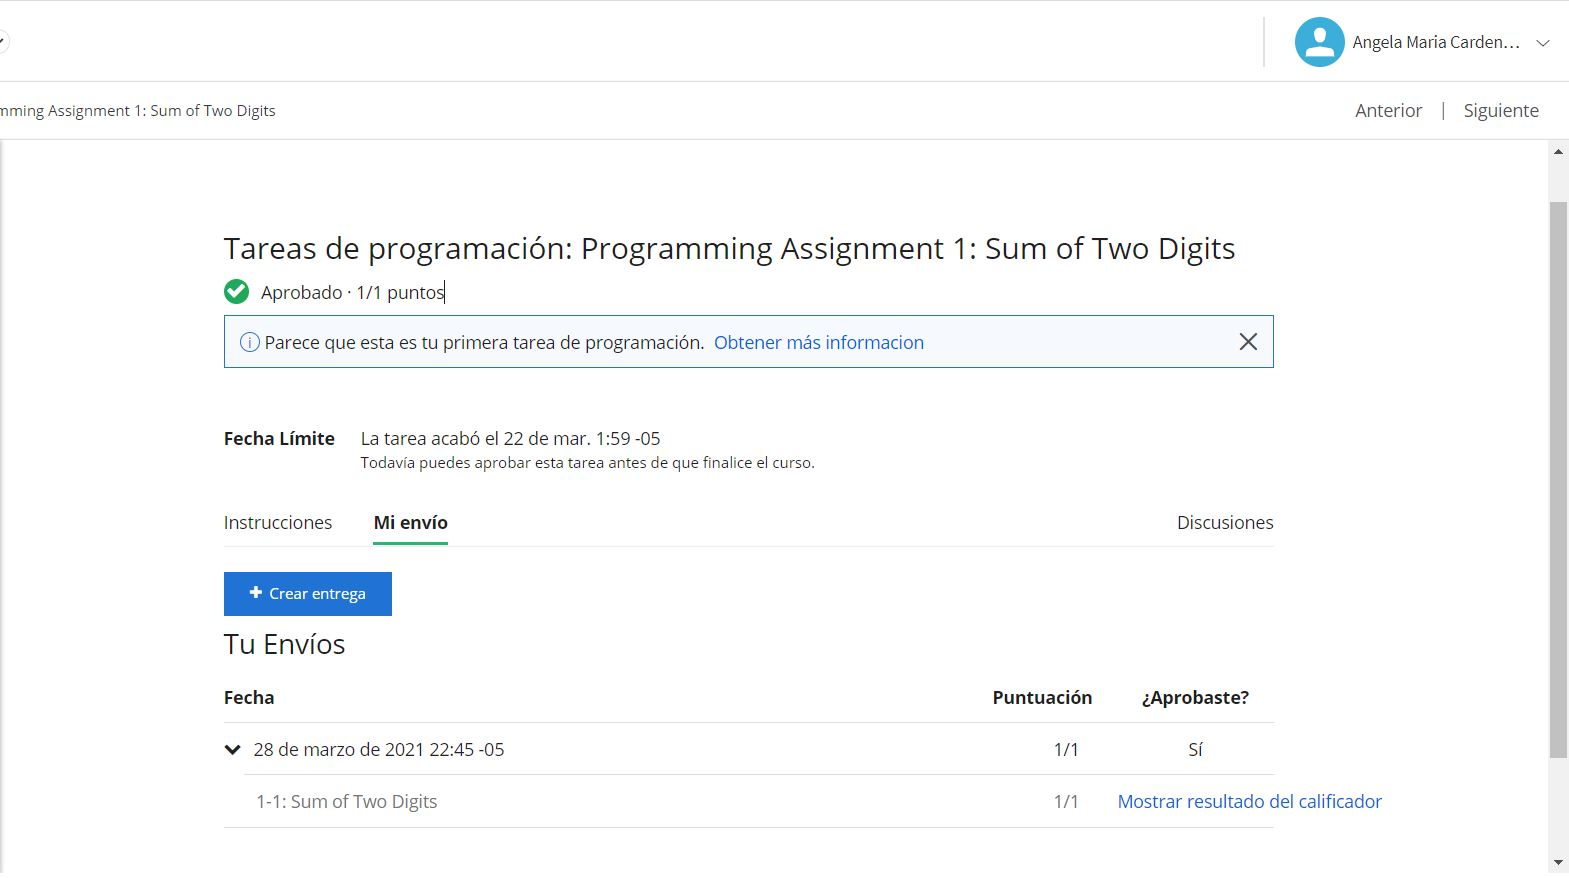

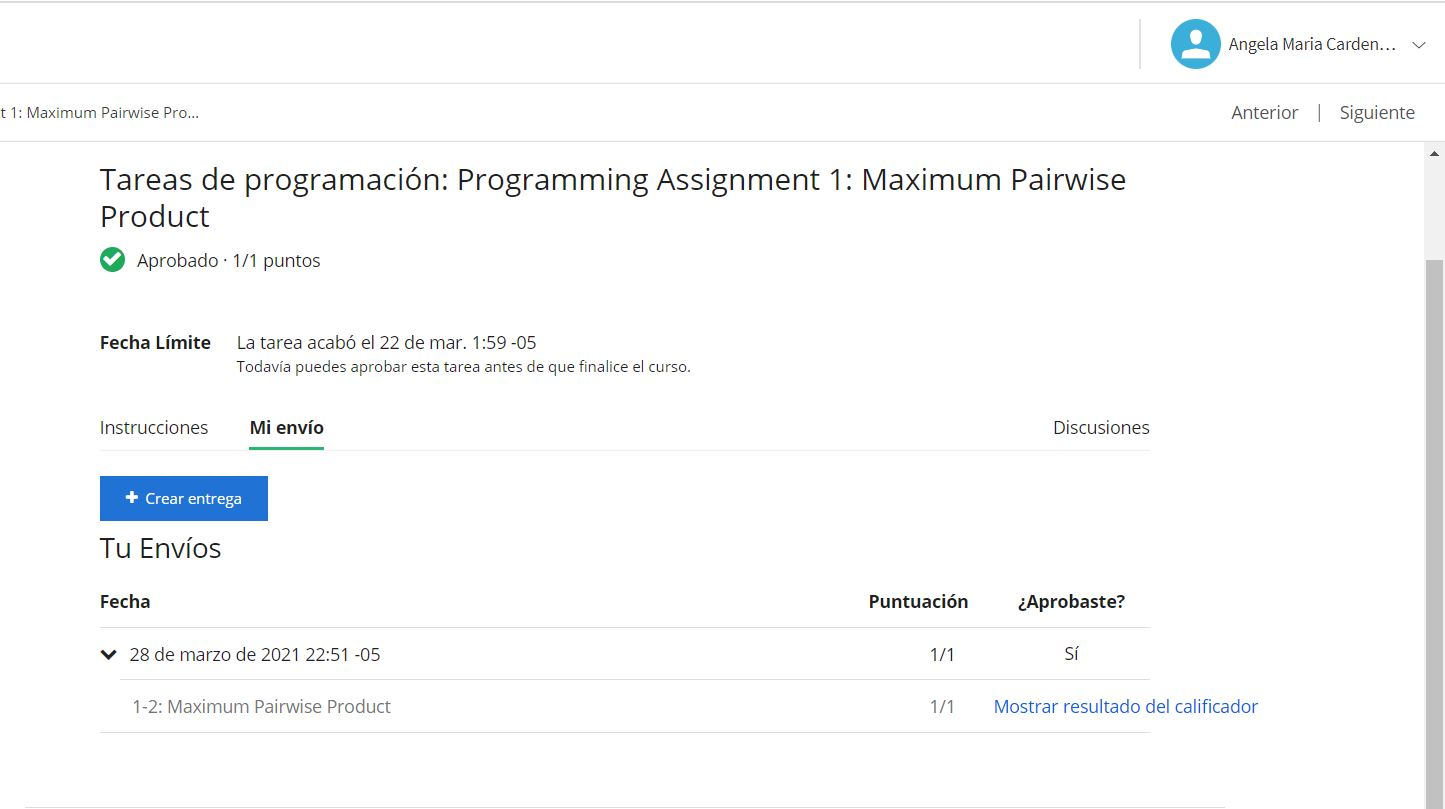